In [7]:
import numpy as np, pandas as pd , matplotlib.pyplot as plt , seaborn  as sns 
from glob import glob
from fetch_data import fetch_data

<h1>Calculating by Power Table</h1>

In [2]:
data_power = fetch_data(20240201,20240331,'power')

In [9]:
unique_columns = ["match_id","set_num","game_num"]
data_power = data_power.drop_duplicates(subset=unique_columns)

In [10]:
sum(data_power["break_occurred"].isna())

0

In [11]:
Break = (data_power["break_occurred"] == True)

data = data_power[Break]

data.to_csv("../data/external/17/average_breaks_per_match.csv",index=False)

data

,match_id,set_num,game_num,value,break_occurred
4,11998445,1,5,26.60,True
7,11998445,1,8,-59.30,True
11,11998445,1,12,-32.98,True
14,11998445,2,3,53.10,True
18,11998445,2,7,63.18,True
...,...,...,...,...,...
469665,12213803,1,5,-10.00,True
469666,12213803,1,6,69.00,True
469670,12213803,2,1,75.00,True
469674,12213803,2,5,10.00,True


In [12]:
breaks_list = data.groupby("match_id")["break_occurred"].sum().values

In [13]:
the_average_number_of_breaks_of_serve_per_match = float(np.mean(breaks_list))
the_average_number_of_breaks_of_serve_per_match

7.004326273095989

<h2>power table IQR Method</h2>

In [9]:
data.groupby("match_id")["break_occurred"].sum().describe()

count    11095.000000
mean         7.004326
std          3.261482
min          1.000000
25%          5.000000
50%          6.000000
75%          9.000000
max         29.000000
Name: break_occurred, dtype: float64

(array([5.380e+02, 1.955e+03, 3.093e+03, 2.401e+03, 1.536e+03, 8.430e+02,
        4.230e+02, 1.290e+02, 1.120e+02, 4.200e+01, 1.900e+01, 3.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1.        ,  2.86666667,  4.73333333,  6.6       ,  8.46666667,
        10.33333333, 12.2       , 14.06666667, 15.93333333, 17.8       ,
        19.66666667, 21.53333333, 23.4       , 25.26666667, 27.13333333,
        29.        ]),
 <BarContainer object of 15 artists>)

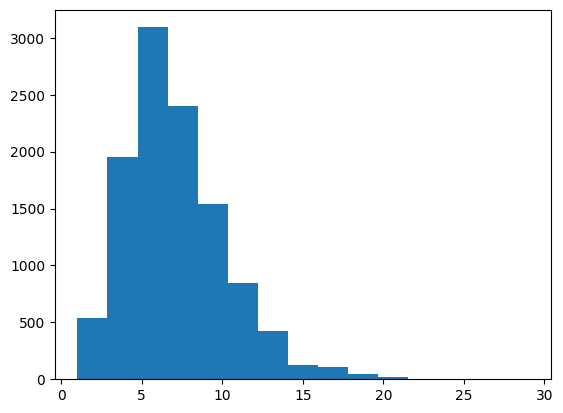

In [10]:
data = data.groupby("match_id")["break_occurred"].sum()
plt.hist(data,bins=15)

In [11]:
q1 = data.quantile(.25)
q3 = data.quantile(.75)
iqr = q3 - q1

bottom_range = (data >= (q1 - 1.5 * iqr))
top_range = (data <=  (q3 + 1.5  * iqr))

correct_data = data[bottom_range & top_range]
correct_data

match_id
11998445    9
11998446    6
11998447    4
11998448    6
11998449    3
           ..
12213482    9
12213483    7
12213484    9
12213486    5
12213803    6
Name: break_occurred, Length: 10918, dtype: int64

In [12]:
the_average_number_of_breaks_of_serve_per_match = float(np.mean(correct_data))
the_average_number_of_breaks_of_serve_per_match

6.835409415643891

<h1>Calculating by Game Info table</h1>

In [5]:
data_pbp = fetch_data(20240201,20240331,'pbp')


In [14]:
unique_columns = ["match_id","set_id","game_id"]
data_pbp = data_pbp.drop_duplicates(subset=unique_columns)

In [15]:
Break = (data_pbp["serving"] != data_pbp["scoring"])

data = data_pbp[Break]


In [16]:
usefull_columns = ["match_id" , 'game_id']
data = data[usefull_columns]
data["break_occurred"] = True
data

,match_id,game_id,break_occurred
0,11998445,13,True
25,11998445,10,True
39,11998445,7,True
51,11998445,4,True
63,11998445,1,True
...,...,...,...
2549267,12213803,5,True
2549301,12213803,1,True
2549329,12213803,6,True
2549333,12213803,5,True


In [17]:
breaks_list_2 = data.groupby("match_id")["break_occurred"].sum().values

In [18]:
the_average_number_of_breaks_of_serve_per_match = float(np.mean(breaks_list_2))
the_average_number_of_breaks_of_serve_per_match

6.830957602339181

<h2>game info IQR Method</h2>

In [19]:
data.groupby("match_id")["break_occurred"].sum().describe()

count    10944.000000
mean         6.830958
std          3.108787
min          1.000000
25%          5.000000
50%          6.000000
75%          9.000000
max         29.000000
Name: break_occurred, dtype: float64

(array([4.950e+02, 2.034e+03, 3.230e+03, 2.392e+03, 1.449e+03, 7.510e+02,
        3.530e+02, 9.700e+01, 1.020e+02, 2.600e+01, 1.200e+01, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1.        ,  2.86666667,  4.73333333,  6.6       ,  8.46666667,
        10.33333333, 12.2       , 14.06666667, 15.93333333, 17.8       ,
        19.66666667, 21.53333333, 23.4       , 25.26666667, 27.13333333,
        29.        ]),
 <BarContainer object of 15 artists>)

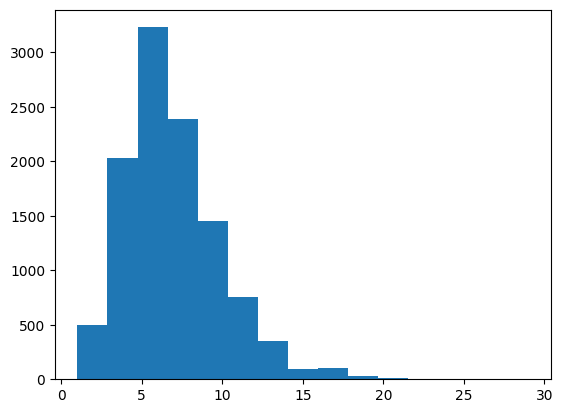

In [20]:
data = data.groupby("match_id")["break_occurred"].sum()
plt.hist(data, bins=15)

In [21]:
q1 = data.quantile(.25)
q3 = data.quantile(.75)
iqr = q3 - q1

bottom_range = (data >= (q1 - 1.5 * iqr))
top_range = (data <=  (q3 + 1.5  * iqr))

correct_data = data[bottom_range & top_range]
correct_data

match_id
11998445    10
11998446     6
11998447     4
11998448     6
11998449     3
            ..
12213482     9
12213483     7
12213484     9
12213486     5
12213803     6
Name: break_occurred, Length: 10801, dtype: int64

In [22]:
the_average_number_of_breaks_of_serve_per_match = float(np.mean(correct_data))
the_average_number_of_breaks_of_serve_per_match

6.692898805666142